In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import captum.optim as optimviz
from inceptionv1 import model as inceptionv1
import prior_optimization

In [24]:
target = inceptionv1.fc
channel = 309

print(target)

Linear(in_features=1024, out_features=1000, bias=True)


Running optim with lr = 0.001


  0%|          | 0/128 [00:00<?, ? step/s]

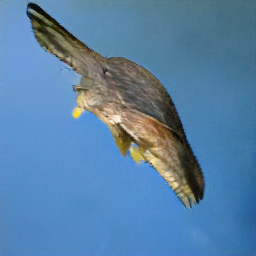

tensor(296, device='cuda:0')


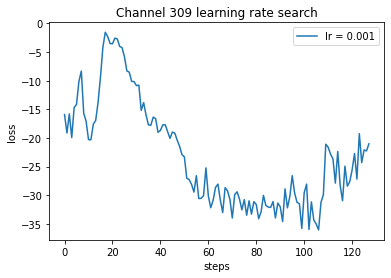

In [70]:
from prior_optimization import create_optimized_image, display_optimized_image
import matplotlib.pyplot as plt
import numpy as np

plt.title(f"Channel {channel} learning rate search")
plt.ylabel("loss")
plt.xlabel("steps")

for lr in np.logspace(-3, -3, 1):
    biggan_input, loss_history, class_vector = create_optimized_image(target=target, channel=channel, n_steps=128, lr=lr)
    display_optimized_image(biggan_input)
    plt.plot(loss_history.cpu().detach().numpy(), label="lr = " + str(lr))
    
    print(torch.argmax(class_vector))
    # break
plt.legend()
plt.show();

In [68]:
import torch
print(class_vector)

Parameter containing:
tensor([0.0007, 0.0011, 0.0009, 0.0009, 0.0009, 0.0009, 0.0010, 0.0011, 0.0010,
        0.0011, 0.0011, 0.0010, 0.0010, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0012, 0.0010, 0.0010, 0.0010, 0.0011, 0.0012, 0.0012,
        0.0013, 0.0011, 0.0009, 0.0012, 0.0011, 0.0012, 0.0010, 0.0010, 0.0011,
        0.0012, 0.0012, 0.0011, 0.0011, 0.0010, 0.0012, 0.0011, 0.0010, 0.0011,
        0.0012, 0.0010, 0.0011, 0.0012, 0.0013, 0.0013, 0.0010, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0013, 0.0010, 0.0010, 0.0011, 0.0013,
        0.0010, 0.0010, 0.0010, 0.0011, 0.0012, 0.0012, 0.0010, 0.0011, 0.0011,
        0.0010, 0.0009, 0.0010, 0.0013, 0.0011, 0.0010, 0.0011, 0.0010, 0.0013,
        0.0011, 0.0012, 0.0014, 0.0012, 0.0012, 0.0013, 0.0008, 0.0009, 0.0010,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0010, 0.0011, 0.0010, 0.0014, 0.0013,
        0.0012, 0.0012, 0.0011, 0.0011, 0.0010, 0.0012, 0.0011, 0.0010, 0.0007,
        0.0010, 0.